In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

data_directory = '/content/drive/MyDrive/dataset'

for root, dirs, files in os.walk(data_directory):
    print("Root directory:", root)
    print("Subdirectories:", dirs)
    print("Files:", files[:5])
    if root != data_directory:
        dirs[:] = []


Root directory: /content/drive/MyDrive/dataset
Subdirectories: ['data', 'Resume']
Files: ['categorized_resumes.csv']
Root directory: /content/drive/MyDrive/dataset/data
Subdirectories: ['data']
Files: []
Root directory: /content/drive/MyDrive/dataset/Resume
Subdirectories: []
Files: ['Resume.csv']


# **Structure of Dataset**

In [3]:
import pandas as pd

csv_file_path = '/content/drive/MyDrive/dataset/Resume/Resume.csv'

resume_df = pd.read_csv(csv_file_path)

print(resume_df.head())


         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  


In [4]:

resume_df = pd.read_csv(csv_file_path)
print("Column names in the CSV file:", resume_df.columns.tolist())


Column names in the CSV file: ['ID', 'Resume_str', 'Resume_html', 'Category']


# **Preprocess the Data**

In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

csv_file_path = '/content/drive/MyDrive/dataset/Resume/Resume.csv'

resume_df = pd.read_csv(csv_file_path)

def preprocess_text(text):

    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
    return " ".join(filtered_tokens)

resume_df['cleaned_text'] = resume_df['Resume_str'].apply(preprocess_text)

print(resume_df['cleaned_text'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    hr associate hr administrator summary dedicate...
1    hr specialist us hr operations summary versati...
2    hr director summary 20 years experience recrui...
3    hr specialist summary dedicated driven dynamic...
4    hr manager skill highlights hr skills hr depar...
Name: cleaned_text, dtype: object


# **Feature Extraction and Model Training**

I use RandomForestClassifier

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from google.colab import files
import pandas as pd

vectorizer = TfidfVectorizer(max_features=1000)

X = vectorizer.fit_transform(resume_df['cleaned_text'])
y = resume_df['Category']

train_val_df, test_df = train_test_split(resume_df, test_size=0.1, random_state=42)

train_df, val_df = train_test_split(train_val_df, test_size=1/9, random_state=42)

X_train = vectorizer.fit_transform(train_df['cleaned_text'])
X_test = vectorizer.transform(test_df['cleaned_text'])

y_train = train_df['Category']
y_test = test_df['Category']

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, predictions))

if len(test_df) == len(predictions):

    results_df = pd.DataFrame({
        'ID': test_df['ID'],
        'Category': predictions
    })

    results_df.to_csv('/content/drive/MyDrive/dataset/categorized_resumes.csv', index=False)
    print("Sample output CSV file created and saved!")

    file_path = '/content/drive/MyDrive/dataset/categorized_resumes.csv'

    files.download(file_path)
else:
    print(f"Length mismatch: test_df has {len(test_df)} rows but predictions have {len(predictions)} rows.")


Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.93      0.93      0.93        14
              ADVOCATE       0.88      0.88      0.88        16
           AGRICULTURE       0.00      0.00      0.00         7
               APPAREL       0.50      0.27      0.35        11
                  ARTS       0.50      0.40      0.44         5
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.91      0.91      0.91        11
               BANKING       0.82      0.69      0.75        13
  BUSINESS-DEVELOPMENT       0.77      0.67      0.71        15
                  CHEF       1.00      0.92      0.96        13
          CONSTRUCTION       0.89      1.00      0.94        16
            CONSULTANT       0.88      0.58      0.70        12
              DESIGNER       0.85      1.00      0.92        11
         DIGITAL-MEDIA       1.00      1.00      1.00        13
           ENGIN

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Result Analysis**

In [19]:
print(classification_report(y_test, predictions, zero_division=0))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.93      0.93      0.93        14
              ADVOCATE       0.88      0.88      0.88        16
           AGRICULTURE       0.00      0.00      0.00         7
               APPAREL       0.50      0.27      0.35        11
                  ARTS       0.50      0.40      0.44         5
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.91      0.91      0.91        11
               BANKING       0.82      0.69      0.75        13
  BUSINESS-DEVELOPMENT       0.77      0.67      0.71        15
                  CHEF       1.00      0.92      0.96        13
          CONSTRUCTION       0.89      1.00      0.94        16
            CONSULTANT       0.88      0.58      0.70        12
              DESIGNER       0.85      1.00      0.92        11
         DIGITAL-MEDIA       1.00      1.00      1.00        13
           ENGINEERING       0.55      

# **Confusion Matrix**

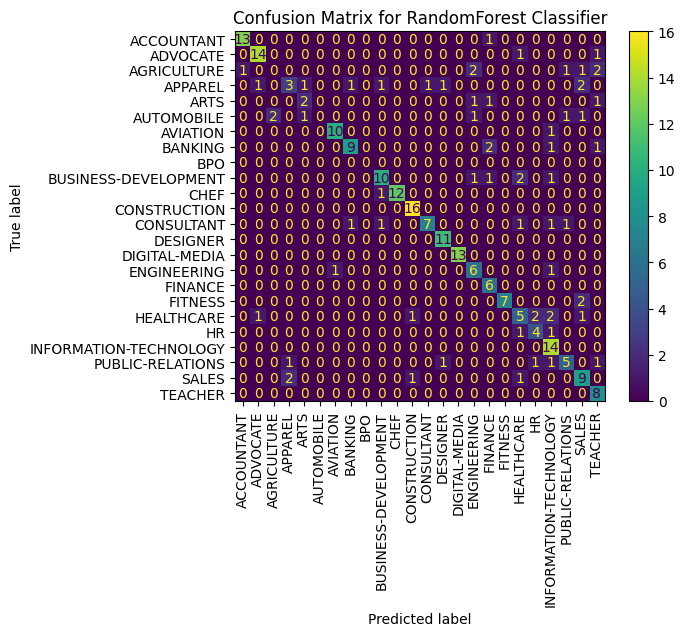

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


predictions = model.predict(X_test)


cm = confusion_matrix(y_test, predictions, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(include_values=True, cmap='viridis', xticks_rotation='vertical', values_format='.0f')
plt.title('Confusion Matrix for RandomForest Classifier')
plt.show()


# **Feature Importance Plot**

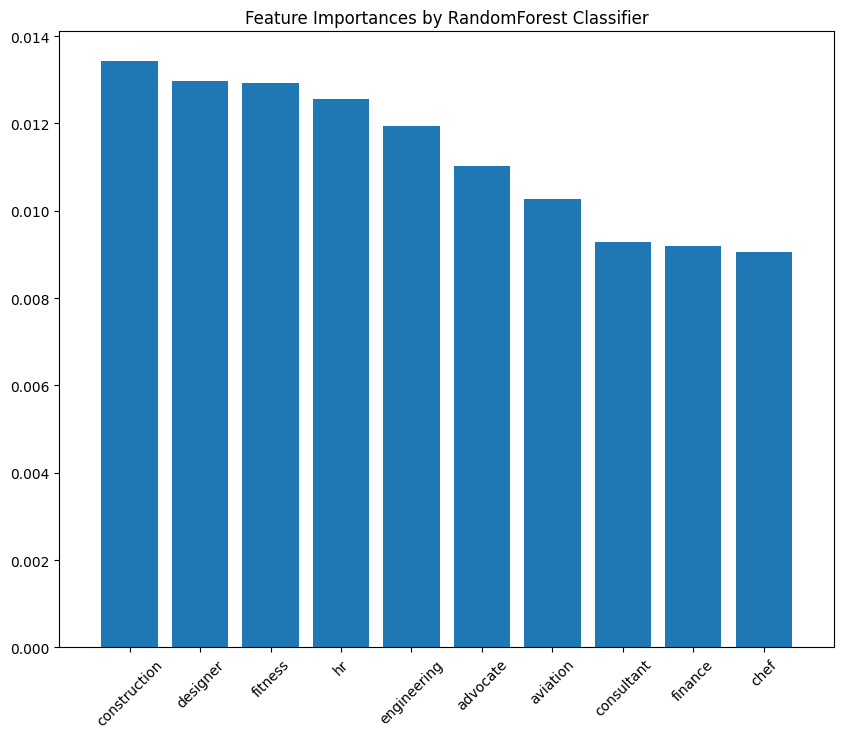

In [21]:
import numpy as np

feature_importances = model.feature_importances_

feature_names = vectorizer.get_feature_names_out()

indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances by RandomForest Classifier")
plt.bar(range(10), feature_importances[indices[:10]], align="center")
plt.xticks(range(10), feature_names[indices[:10]], rotation=45)
plt.xlim([-1, 10])
plt.show()


# ROC Curve

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


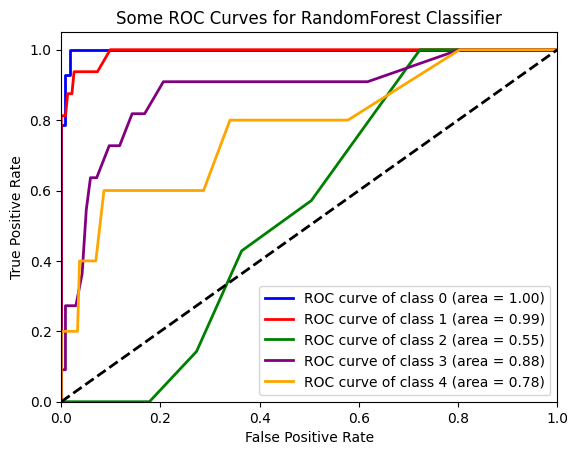

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_bin, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/9, random_state=42)

classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
classifier.fit(X_train, y_train)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], classifier.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = iter(['blue', 'red', 'green', 'purple', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some ROC Curves for RandomForest Classifier')
plt.legend(loc="lower right")
plt.show()
